# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset and making a working copy
Dataset = pd.read_csv("C:/Users/mishp/Google Drive/Project-Coding/creditcard.csv/creditcard.csv")
df = Dataset.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
 # Data Cleaning: Checking for Null value count
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
 # Checking the class count of the data set
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

 This is a highly imbalanced data set.
 

In [10]:
# Normal Transaction Class 0
# Fraud Transaction Class 1

normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [11]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# Statistical Measure of the Data
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Comparing the values for both the transaction 
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
# Undersampling
# Building a sample dataset containing the similar distribution of the normal transactions and Fraudulent Transactions

normal_sample = normal.sample(n=492)

In [17]:
#Concatenating 2 Dataset
df_new = pd.concat([normal_sample, fraud], axis =0)
print(df_new.shape)
df_new.head()

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29423,35467.0,1.323670,-0.433009,0.482461,-0.250998,-0.994711,-0.580109,-0.555787,-0.073624,-1.129296,...,-0.175696,-0.015600,-0.054452,0.367739,0.392567,0.640111,-0.018375,0.005234,10.00,0
58162,48260.0,1.192976,0.131874,0.599210,0.658555,-0.549479,-0.735398,-0.081856,-0.026672,0.182318,...,-0.220635,-0.658351,0.219162,0.365429,0.064452,0.107638,-0.019236,0.016635,1.98,0
189843,128582.0,1.890421,-0.695961,-0.340344,0.277739,-0.489609,0.628360,-0.977790,0.326527,1.166559,...,0.047454,0.096471,0.228524,0.084740,-0.498936,0.150804,-0.012973,-0.036767,52.60,0
250672,155014.0,2.033960,-0.056719,-0.892928,0.517614,-0.373893,-1.462376,0.173515,-0.345807,0.555427,...,-0.265270,-0.644097,0.396443,0.451999,-0.363914,0.170814,-0.071872,-0.056406,0.99,0
131656,79684.0,1.157204,0.235887,0.376727,0.578329,-0.258859,-0.403599,-0.116438,0.090624,-0.187361,...,-0.199776,-0.596296,0.176762,0.173572,0.073551,0.095422,-0.012468,0.018339,0.99,0


In [18]:
df_new['Class'].value_counts()
# SOlved the class imbalance issue by undersampling

1    492
0    492
Name: Class, dtype: int64

In [19]:
# Mean of each column is still approx. same which means sample are still same
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94600.138211,0.031484,0.064292,-0.041164,0.001177,-0.093011,0.049008,-0.013454,-0.076652,-0.016728,...,-0.034152,-0.066993,-0.049407,-0.006954,0.025748,0.016740,0.013437,0.023647,0.006048,88.011037
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
# Splitting the data into features & target
X = df_new.drop(columns = 'Class', axis=1)
Y = df_new['Class']

In [21]:
X.shape

(984, 30)

In [22]:
Y.shape

(984,)

In [23]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [24]:
model_lr = LogisticRegression(max_iter=120,random_state=0, n_jobs=20, solver='liblinear')

In [25]:
model_lr.fit(X_train, y_train)

C:\Users\mishp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(max_iter=120, n_jobs=20, random_state=0, solver='liblinear')

In [26]:
trn_lr_pred = model_lr.predict(X_train) # y-train predict
trn_lr_acc = accuracy_score(trn_lr_pred, y_train)
print(round(trn_lr_acc*100, 2))

95.3


In [27]:
tst_lr_pred = model_lr.predict(X_test) # y-test predict
tst_lr_acc = accuracy_score(tst_lr_pred, y_test)
print(round(tst_lr_acc*100, 2))

94.15


Here accuracy on the train and the test set is almost same which means that model is neither overfitting nor underfitting. # not siliar to the notebook. chcek again

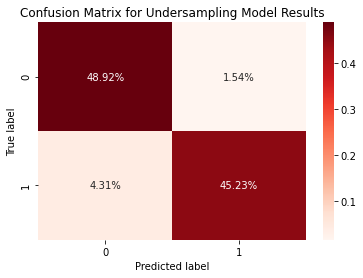

In [31]:
cm1 = confusion_matrix(y_test, tst_lr_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.ylabel('True label', fontsize = 10)
plt.xlabel('Predicted label', fontsize = 10)
plt.title('Confusion Matrix for Undersampling Model Results')
plt.show()

# go chcek recall formula and check if the cm has a good recall 

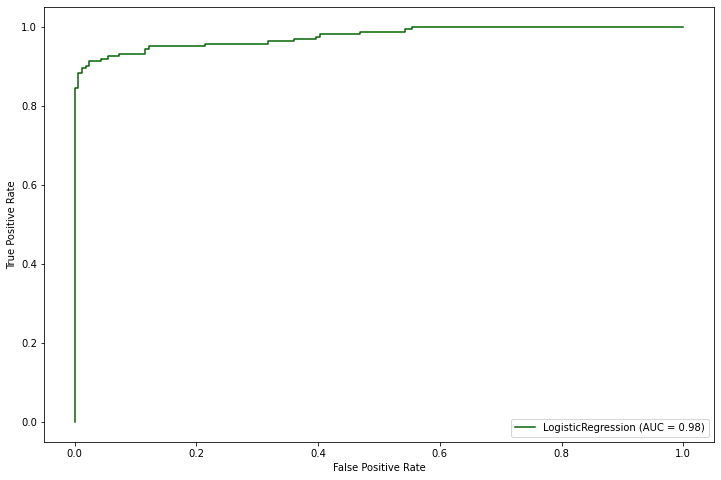

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(model_lr, X_test, y_test, color='darkgreen', ax=ax)

# revise ROC and AUC curve 

In [32]:
print(classification_report(y_test,tst_lr_pred))

# Recall is important, especially for 1.  tells us how much fraud we are accurately predicting


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       164
           1       0.97      0.91      0.94       161

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325



## Using SMOTE for unbalanced Dataset
    

In [33]:
#conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline  ## psykit learn

In [35]:
df.shape


(284807, 31)

In [36]:
X1 = df.drop(columns='Class', axis=1)
y1 = df['Class']

In [37]:
X1.shape, y1.shape

((284807, 30), (284807,))

In [39]:
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)
X_oversampled , y_oversampled = sm.fit_resample(X1, y1)

In [40]:
y_oversampled.value_counts()
# class imbalance problem solved by oversampling

1    284315
0    284315
Name: Class, dtype: int64

In [41]:
pipeline = Pipeline([('model', LogisticRegression(solver='liblinear'))])
pipeline.fit(X_oversampled, y_oversampled)

Pipeline(steps=[('model', LogisticRegression(solver='liblinear'))])

In [44]:
# Summarize the fraud class distribution of the new SMOTE-transformed dataset
unique_original, counts_original = np.unique(y1, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 284315, 1: 492}
New transformed fraud class distribution: {0: 284315, 1: 284315}


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)

In [46]:
model_lr_smt = LogisticRegression(solver='liblinear')
model_lr_smt.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [47]:
trn_lr_smt_pred = model_lr.predict(X_train)
trn_lr_smt_acc = accuracy_score(trn_lr_smt_pred, y_train)
print(round(trn_lr_smt_acc*100, 2))

96.5


In [48]:
tst_lr_smt_pred = model_lr.predict(X_test)
tst_lr_smt_acc = accuracy_score(tst_lr_smt_pred, y_test)
print(round(tst_lr_smt_acc*100, 2))

96.54


<AxesSubplot:>

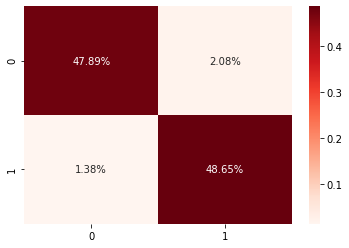

In [49]:
cm2 = confusion_matrix(y_test, tst_lr_smt_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

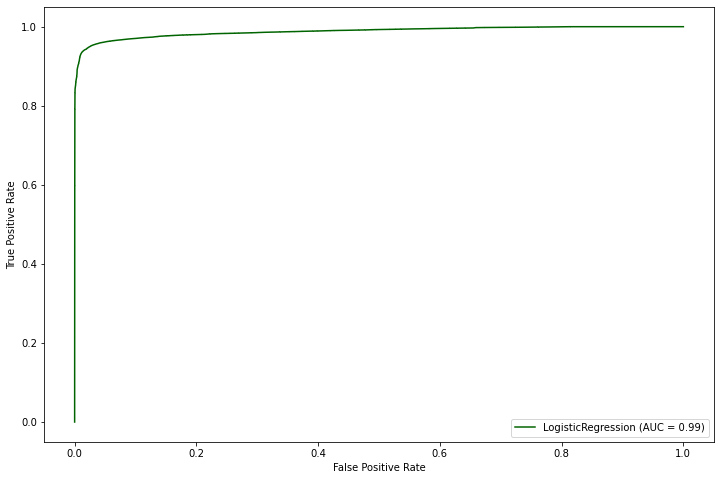

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(model_lr_smt, X_test, y_test, color='darkgreen', ax=ax)

In [51]:
print(classification_report(y_test,tst_lr_smt_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97     93775
           1       0.96      0.97      0.97     93873

    accuracy                           0.97    187648
   macro avg       0.97      0.97      0.97    187648
weighted avg       0.97      0.97      0.97    187648

